In [ ]:
!pip install missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans
import missingno as msno
from scipy.stats import norm, boxcox
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=Warning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path = "Mall_Customers.csv"
df = pd.read_csv(path)
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
df.shape


(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


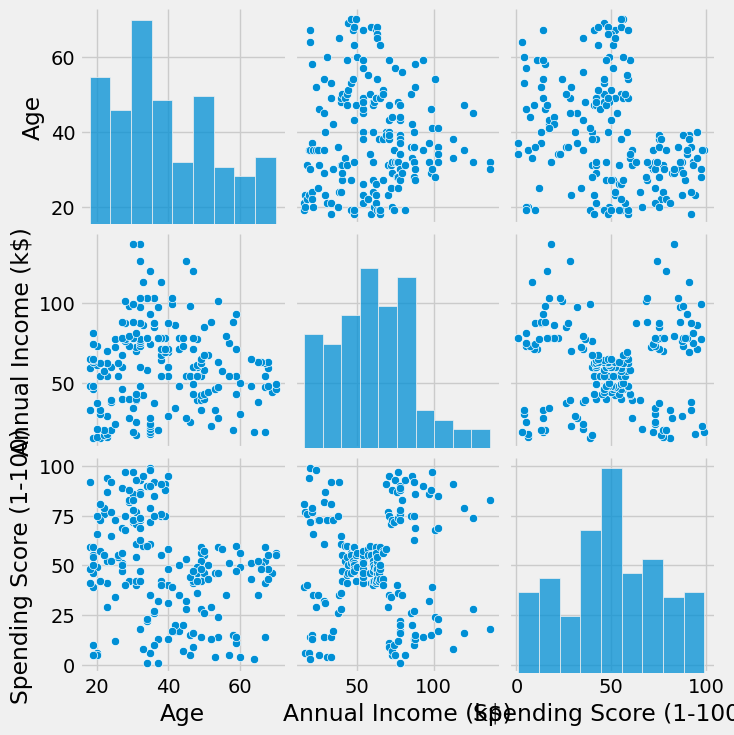

In [ ]:

sns.pairplot(df)

In [ ]:
df.isna().sum()


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

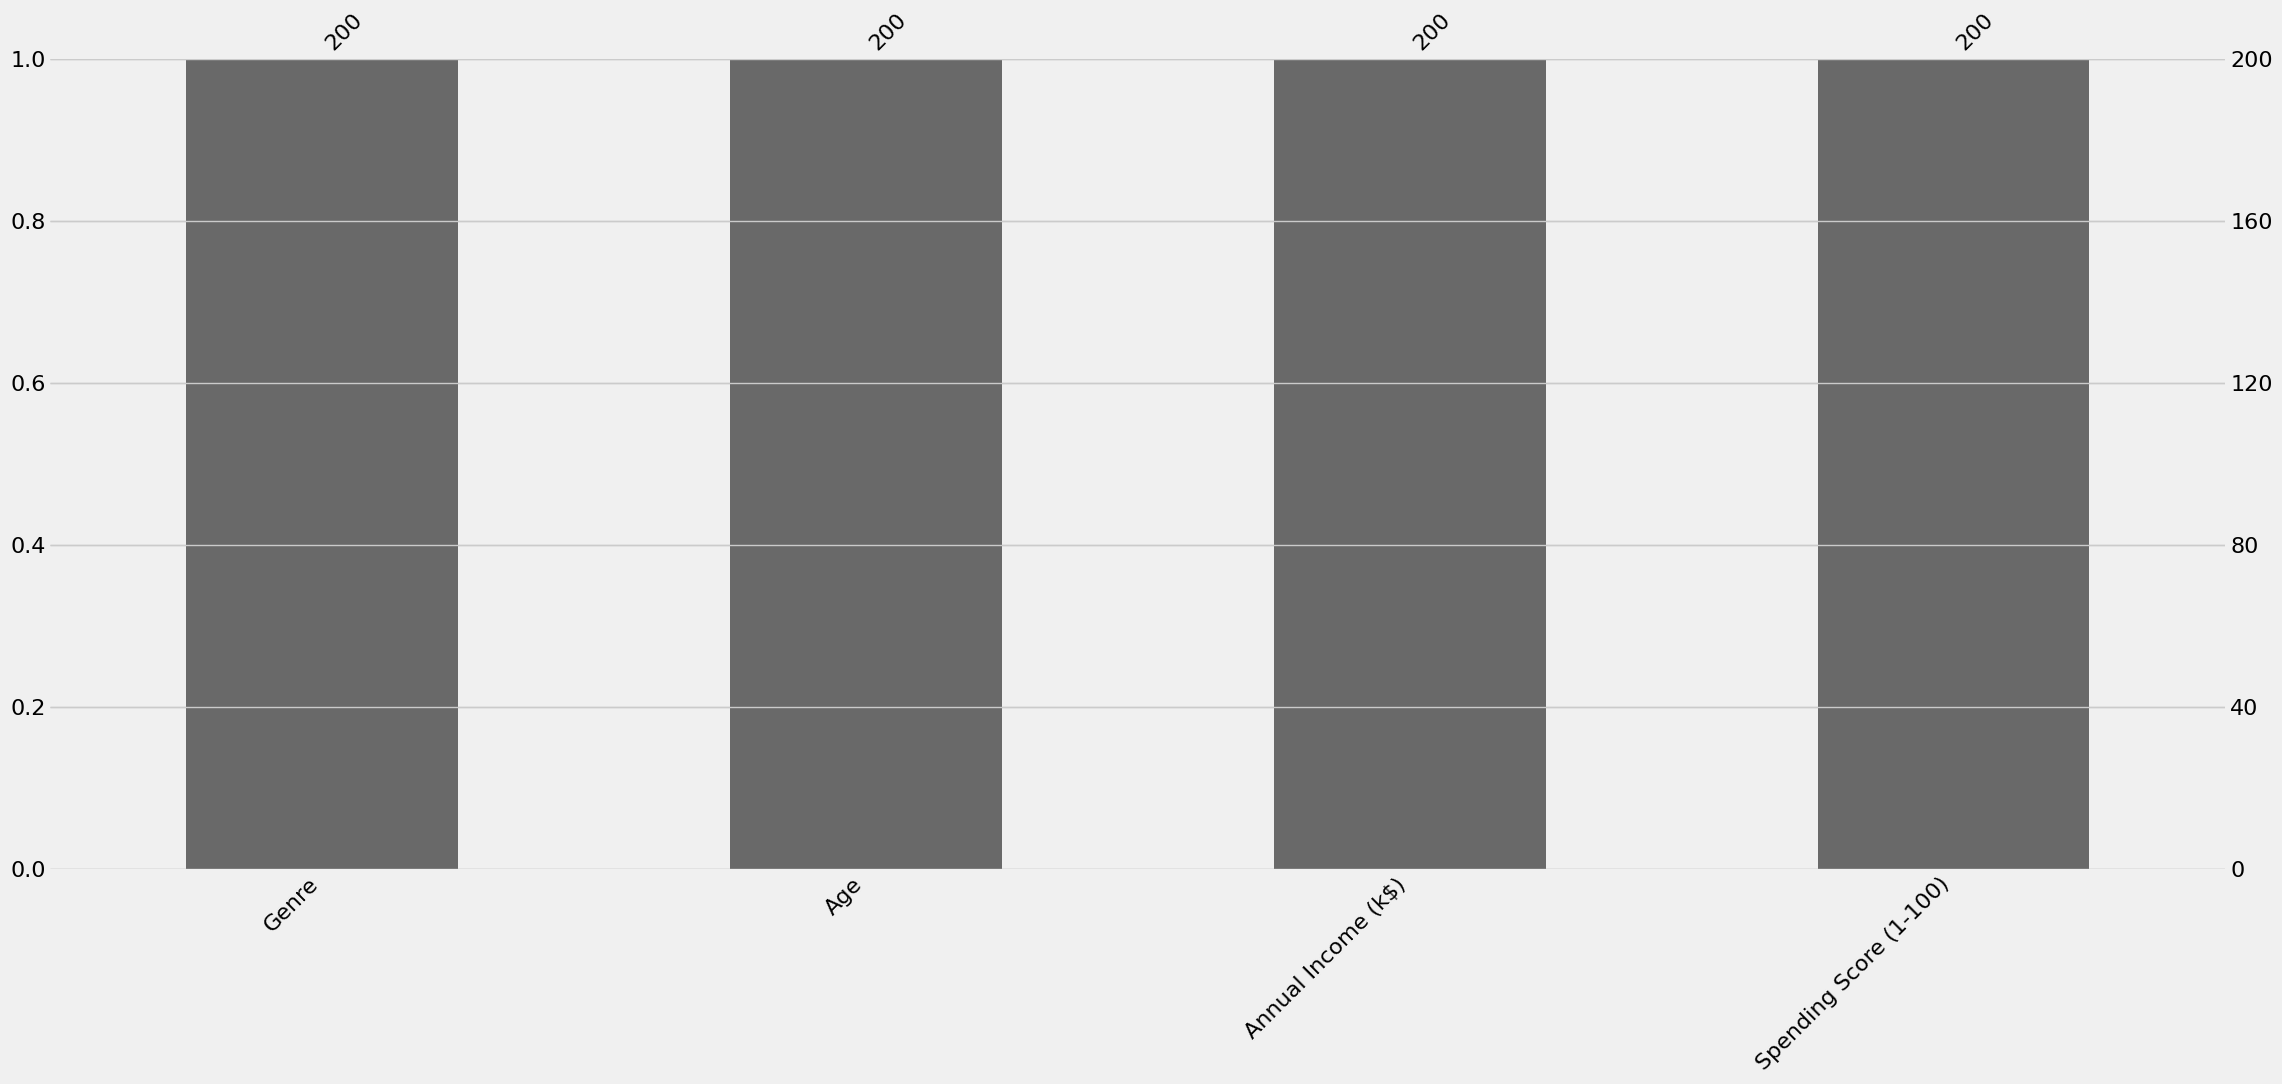

In [ ]:
msno.bar(df)
plt.show()


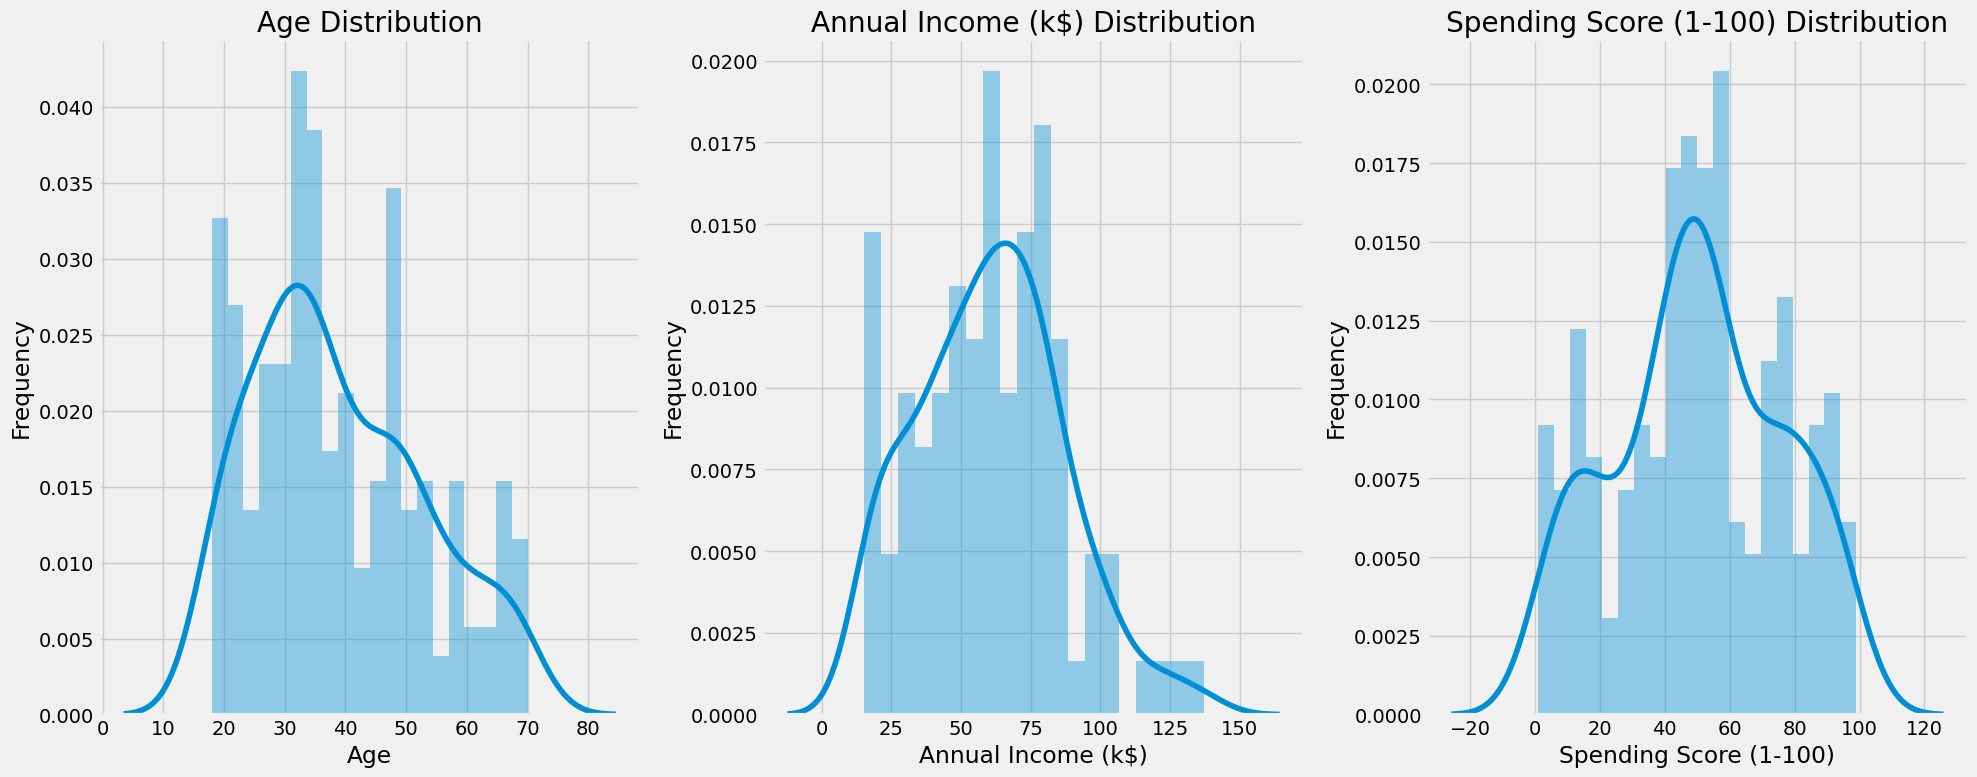

In [ ]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
 ax = plt.subplot(1, 3, i+1)
 sns.distplot(df[col], bins=20, kde=True)
 ax.set_xlabel(col)
 ax.set_ylabel('Frequency')
 ax.set_title(f'{col} Distribution')
plt.tight_layout()
plt.show()

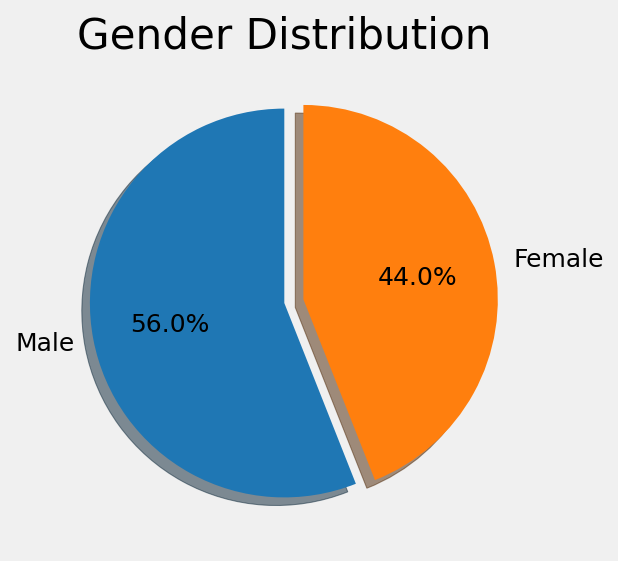

In [ ]:
values = df['Genre'].value_counts()
labels = ['Male', 'Female']
colors = {'Male': '#1f77b4', 'Female': '#ff7f0e'}
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
explode = (0, 0.1)
patches, texts, autotexts = ax.pie(values, labels=labels, colors=[colors[key] for key in labels],
 autopct='%1.1f%%', shadow=True, startangle=90, explode=explode,
 textprops={'fontsize': 12, 'color': 'black'})
ax.set_title('Gender Distribution')
plt.show()

<Axes: >

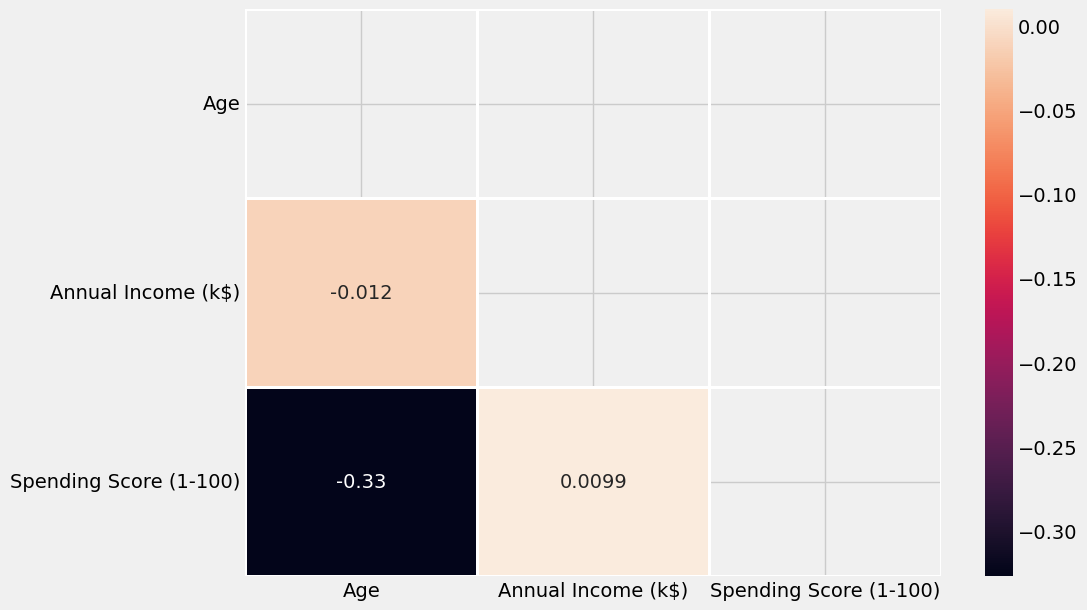

In [ ]:
plt.figure(figsize=(10, 7))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket")

In [ ]:
def skewnessCorrector(columnName):
 print('''Before Correcting''')
 (mu, sigma) = norm.fit(df[columnName])
 print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
 columnName.capitalize(), mu, columnName.capitalize(), sigma))
 plt.figure(figsize=(20, 10))
 plt.subplot(1, 2, 1)
 sns.distplot(df[columnName], fit=norm, color="lightcoral");
 plt.title(columnName.capitalize() +
 " Distplot before Skewness Correction", color="black")
 plt.subplot(1, 2, 2)
 stats.probplot(df[columnName], plot=plt)
 plt.show()
 df[columnName], lam_fixed_acidity = boxcox(
 df[columnName])
 print('''After Correcting''')
 print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
 columnName.capitalize(), mu, columnName.capitalize(), sigma))
 plt.figure(figsize=(20, 10))
 plt.subplot(1, 2, 1)
 sns.distplot(df[columnName], fit=norm, color="orange");
 plt.title(columnName.capitalize() +
 " Distplot After Skewness Correction", color="black")
 plt.subplot(1, 2, 2)
 stats.probplot(df[columnName], plot=plt)
 plt.show()


Before Correcting
Mu before correcting Age : 38.85, Sigma before correcting Age : 13.934041050606963


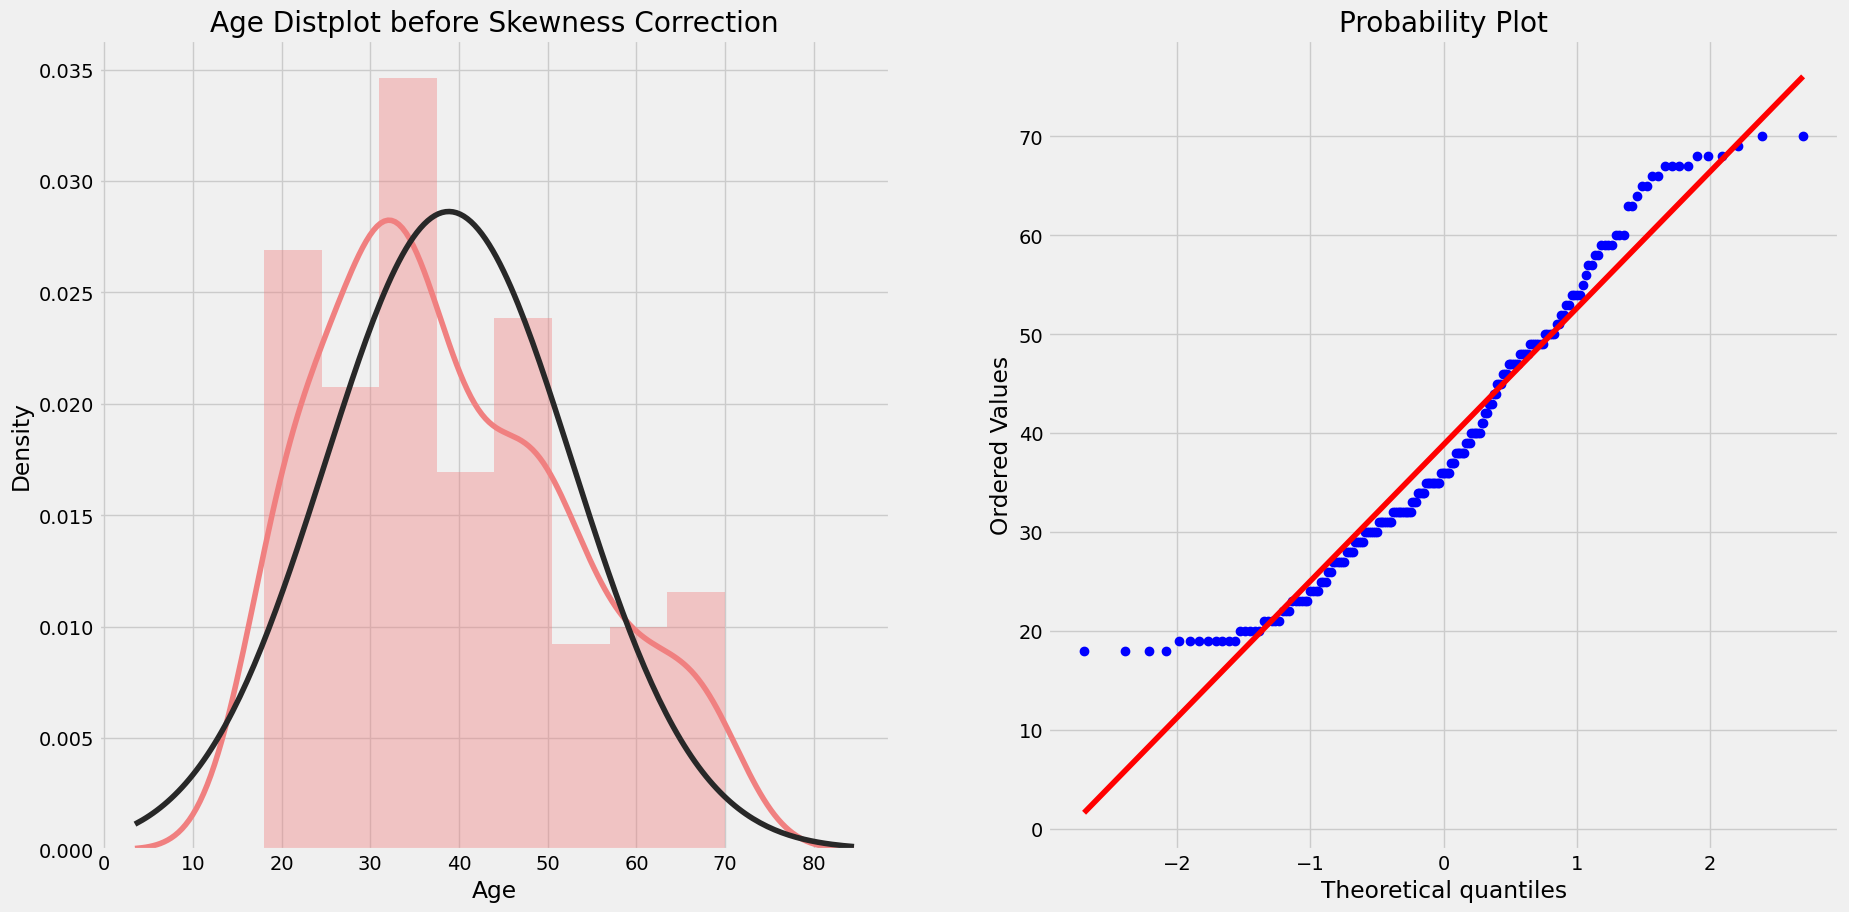

After Correcting
Mu after correcting Age : 38.85, Sigma after correcting Age : 13.934041050606963


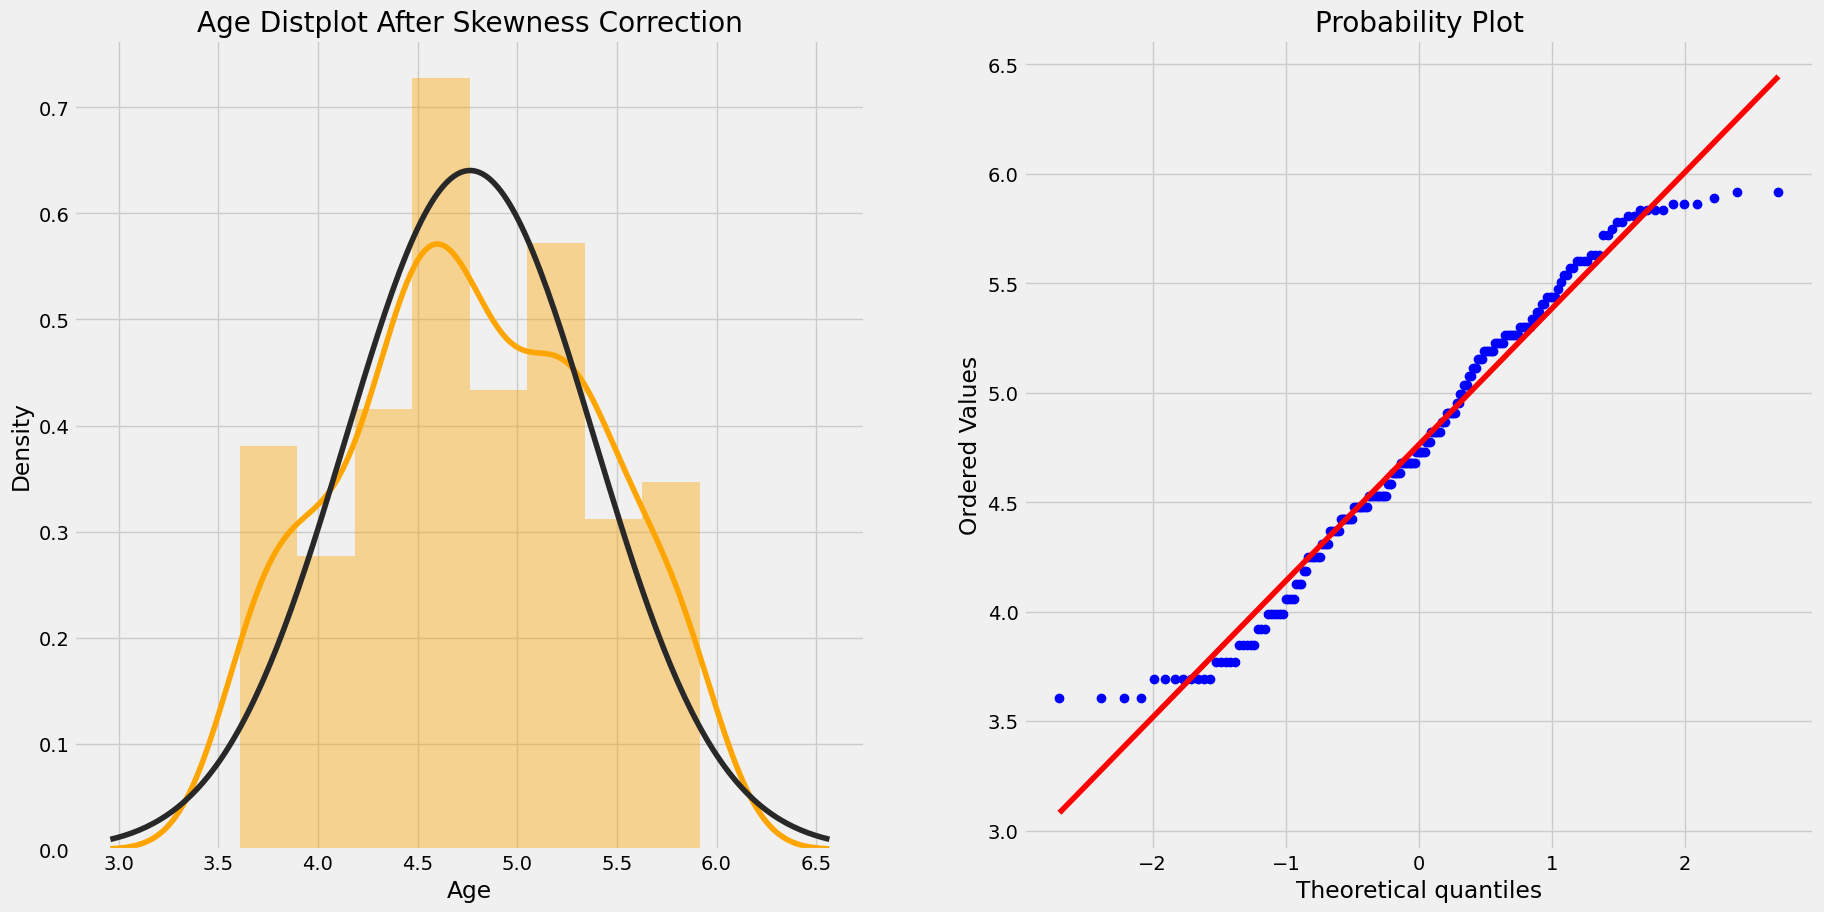

Before Correcting
Mu before correcting Annual income (k$) : 60.56, Sigma before correcting Annual income (k$) : 26.19897707926781


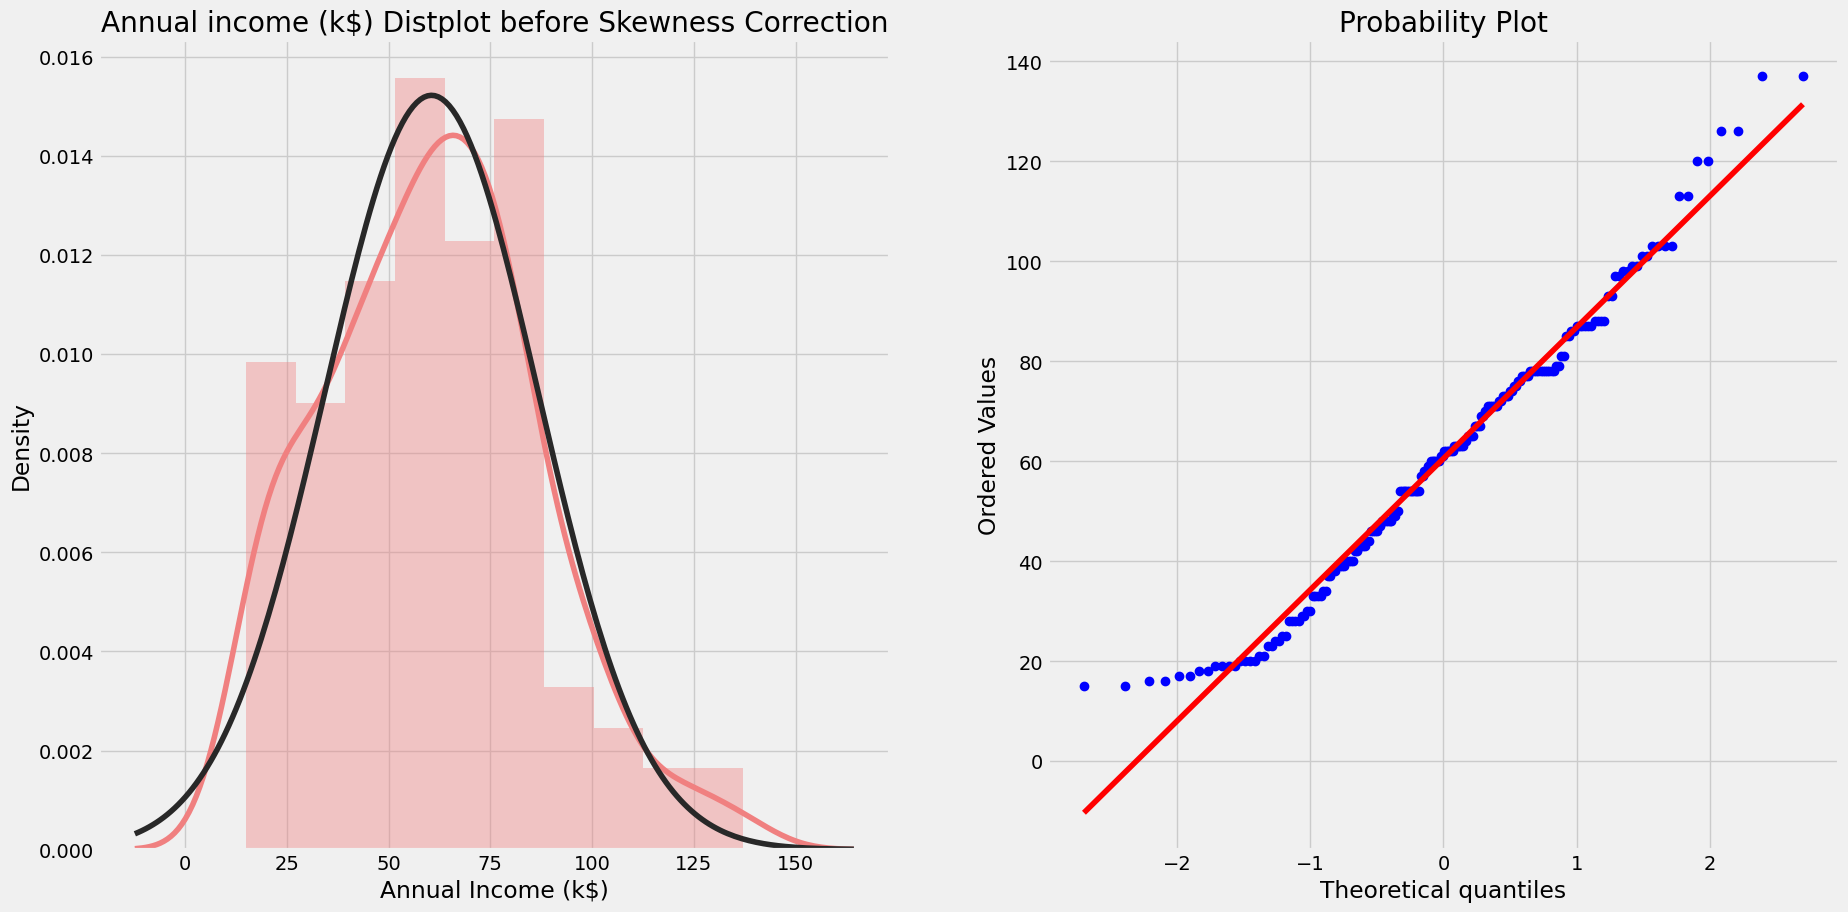

After Correcting
Mu after correcting Annual income (k$) : 60.56, Sigma after correcting Annual income (k$) : 26.19897707926781


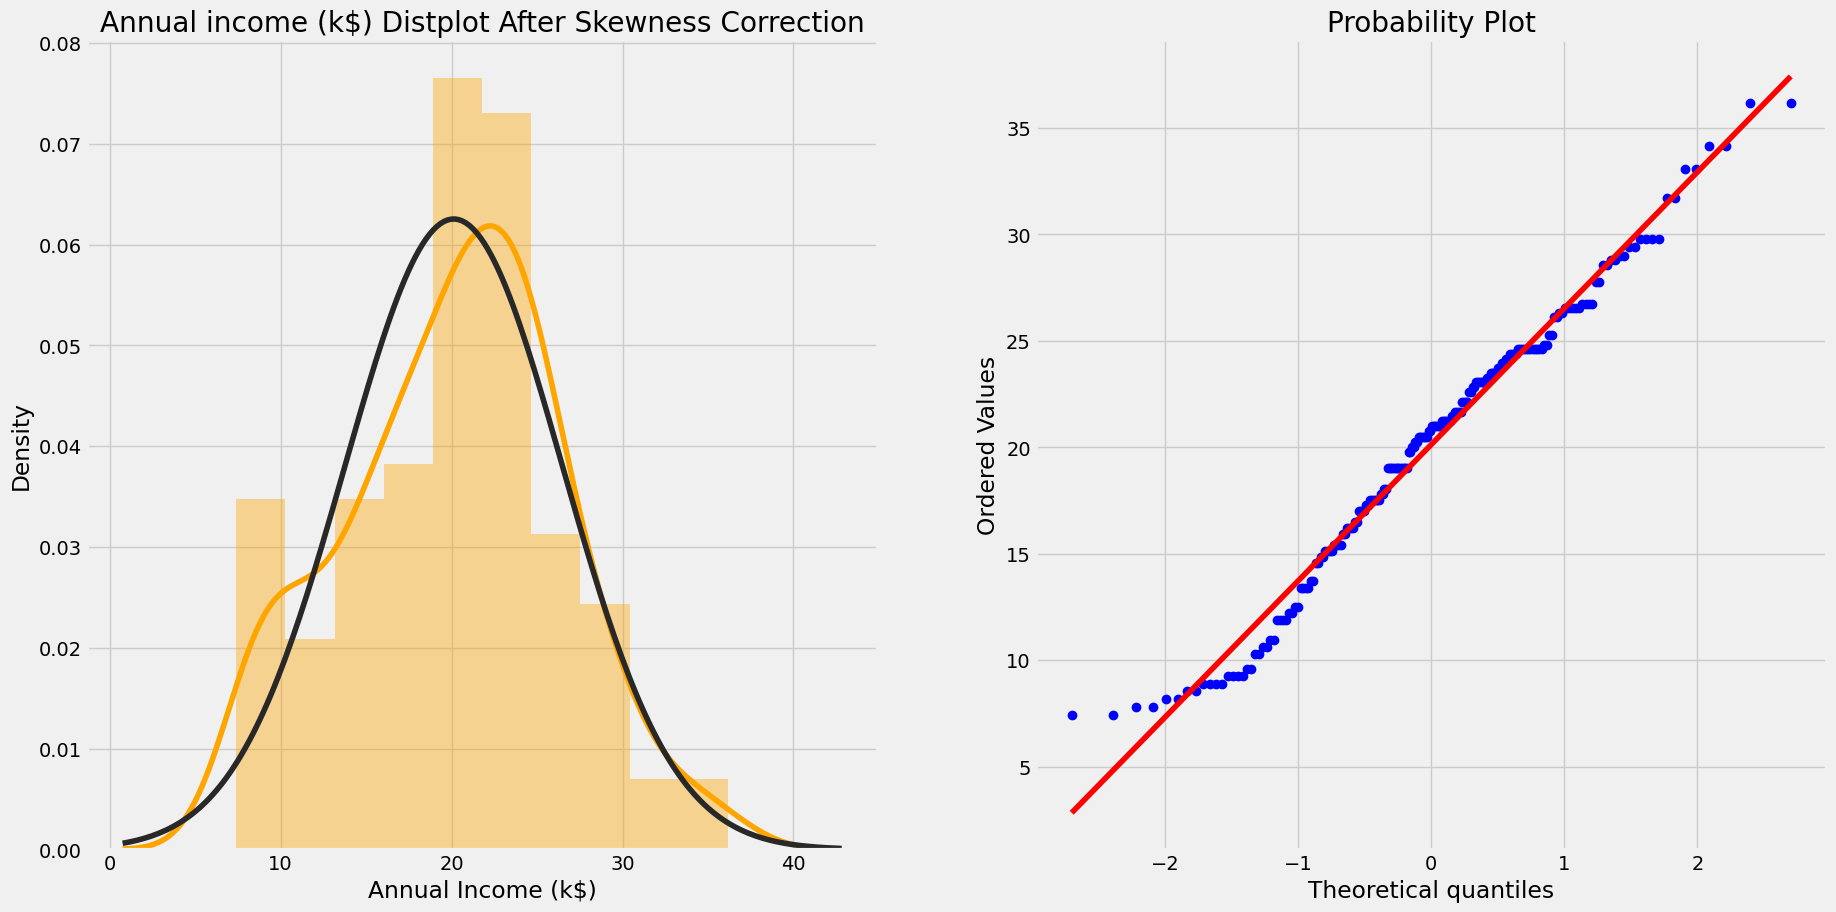

Before Correcting
Mu before correcting Spending score (1-100) : 50.2, Sigma before correcting Spending score (1-100) : 25.7588819633151


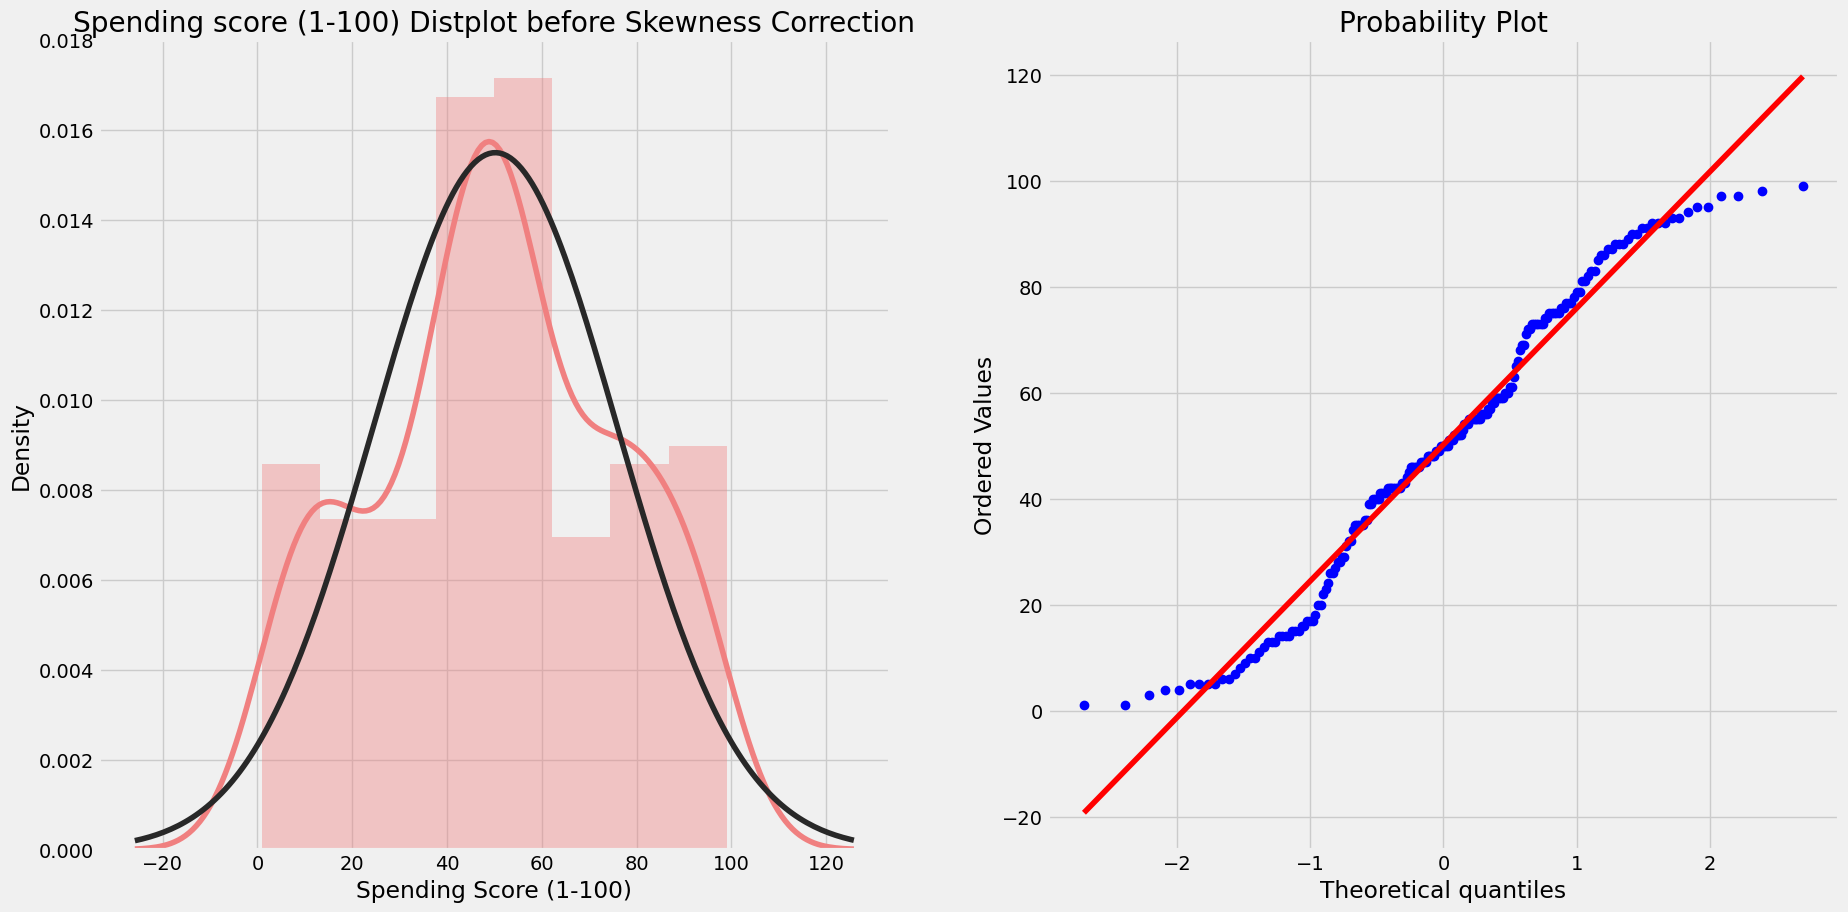

After Correcting
Mu after correcting Spending score (1-100) : 50.2, Sigma after correcting Spending score (1-100) : 25.7588819633151


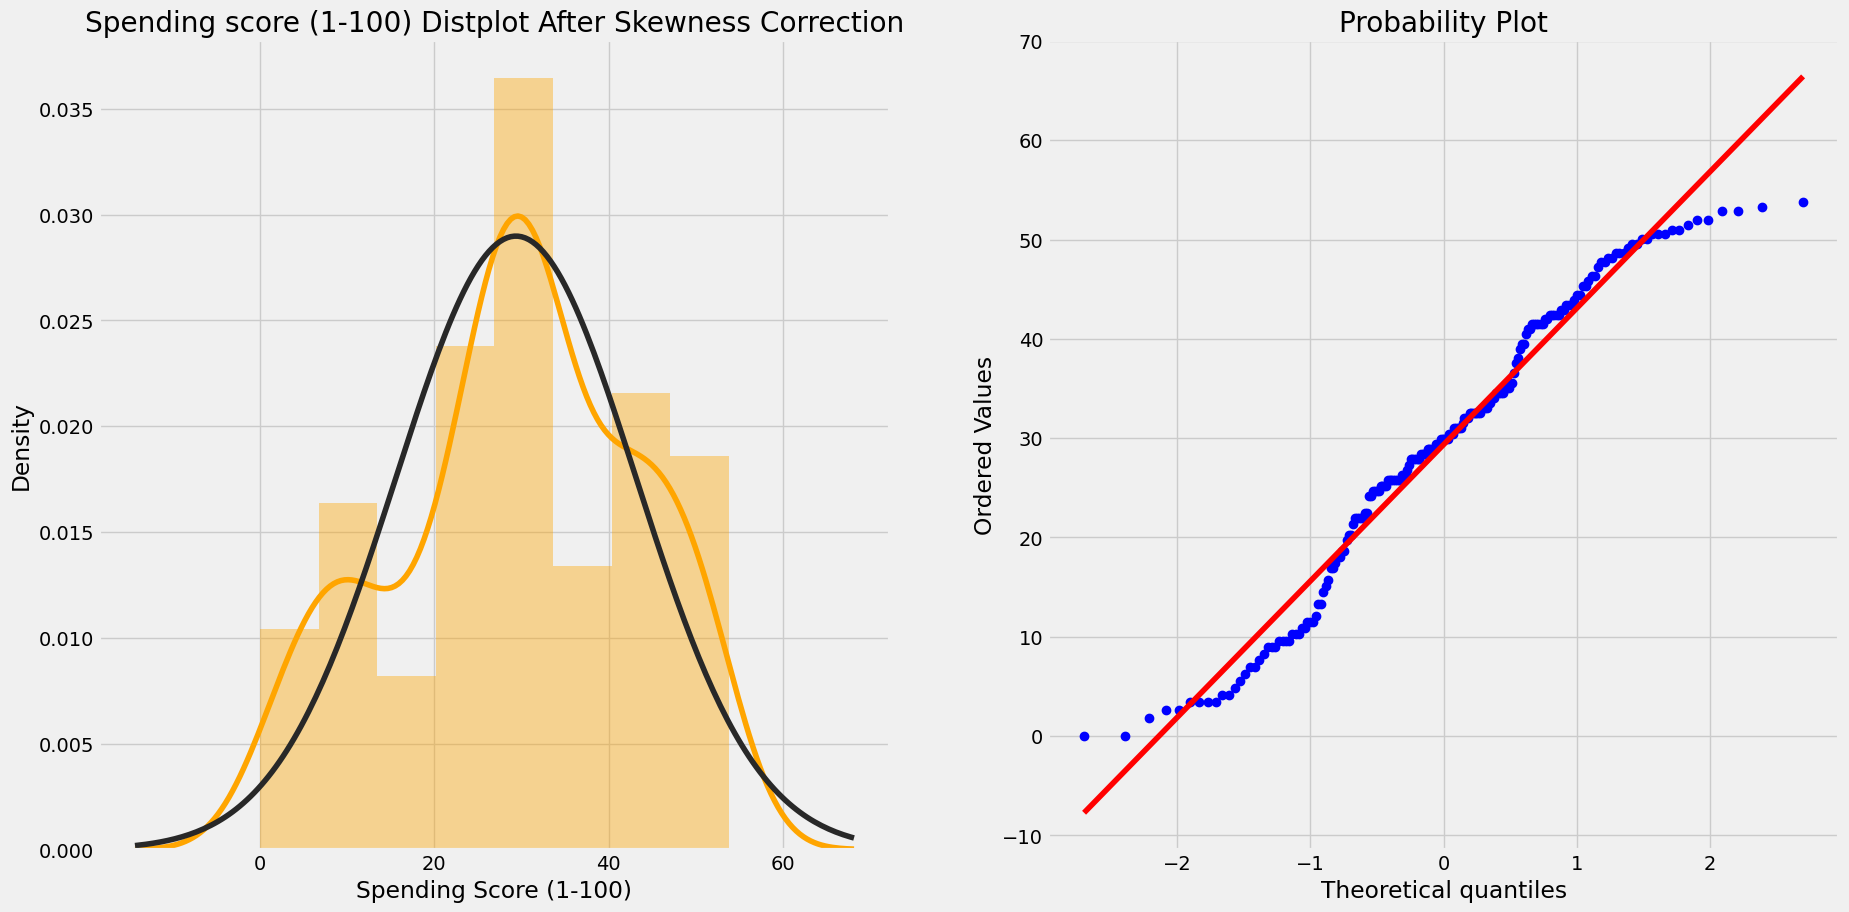

In [ ]:
skewColumnList = ['Age',
 'Annual Income (k$)', 'Spending Score (1-100)']
for columns in skewColumnList:
 skewnessCorrector(columns)

In [ ]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,0.052475,-0.308559
Annual Income (k$),0.052475,1.000000,0.004749
Spending Score (1-100),-0.308559,0.004749,1.000000


<Axes: xlabel='Genre', ylabel='Spending Score (1-100)'>

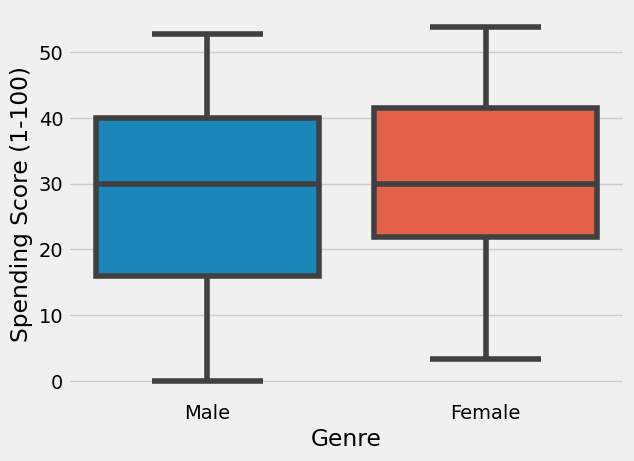

In [ ]:
sns.boxplot(x=df["Genre"],y=df["Spending Score (1-100)"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
Numerics=LabelEncoder()
#data['label']=Numerics.fit_transform(data['label'])
df['Genre']=Numerics.fit_transform(df['Genre'])
print("ok")
print(df)

ok
     Genre       Age  Annual Income (k$)  Spending Score (1-100)
0        1  3.691442            7.409624               24.128630
1        1  3.847430            7.409624               45.328722
2        0  3.771098            7.793130                4.135102
3        0  3.991239            7.793130               43.408853
4        0  4.476951            8.168337               24.667863
..     ...       ...                 ...                     ...
195      0  4.680657           33.053921               44.370829
196      0  5.114323           34.169044               18.025192
197      1  4.529888           34.169044               41.957959
198      1  4.529888           36.166397               12.110742
199      1  4.422538           36.166397               46.282649

[200 rows x 4 columns]


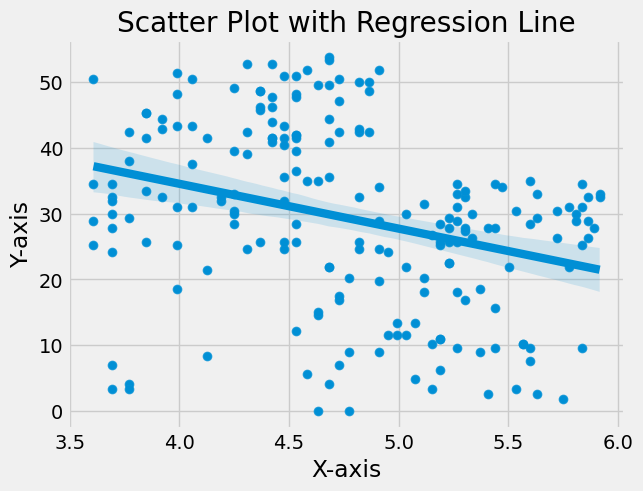

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sample data
x = df['Age'] # X-axis values
y = df['Spending Score (1-100)'] # Y-axis values
# Create scatter plot
sns.scatterplot(x=x, y=y)
# Fit and plot regression line
sns.regplot(x=x, y=y)
# Customize the chart
plt.title("Scatter Plot with Regression Line")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# Display the chart
plt.show()


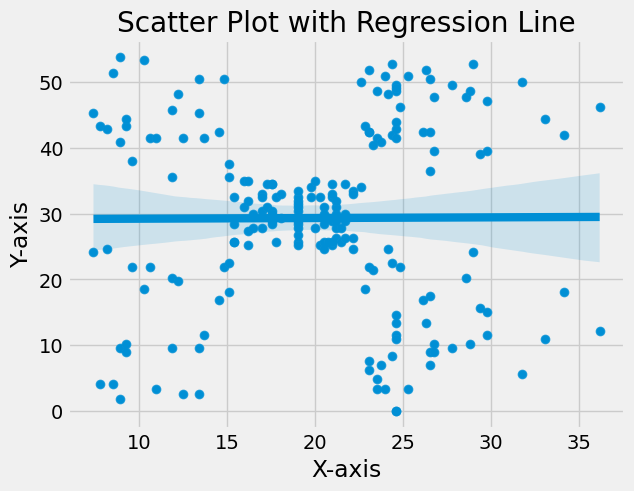

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sample data
x = df['Annual Income (k$)'] # X-axis values
y = df['Spending Score (1-100)'] # Y-axis values
# Create scatter plot
sns.scatterplot(x=x, y=y)
# Fit and plot regression line
sns.regplot(x=x, y=y)
# Customize the chart
plt.title("Scatter Plot with Regression Line")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# Display the chart
plt.show()

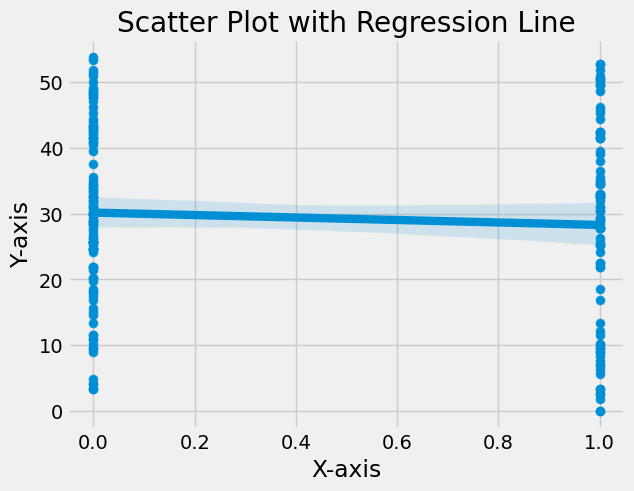

In [ ]:
# Sample data
x = df['Genre'] # X-axis values
y = df['Spending Score (1-100)'] # Y-axis values
# Create scatter plot
sns.scatterplot(x=x, y=y)
# Fit and plot regression line
sns.regplot(x=x, y=y)
# Customize the chart
plt.title("Scatter Plot with Regression Line")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# Display the chart
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
# Assuming you have your dataset stored in a NumPy array called 'data'
# Replace 'data' with your actual dataset
# Instantiate the KMeans object with the desired number of clusters
k = 5
kmeans = KMeans(n_clusters=k)
# Fit the KMeans model to your data
kmeans.fit(df)
# Get the cluster labels for each data point
labels = kmeans.labels_
# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_
# Print the labels and centers
print("Cluster Labels:")
print(labels)
print("\nCluster Centers:")
print(centers)

Cluster Labels:
[4 2 4 2 3 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 3 2 3 3 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 1 0 3 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 3 0
 1 0 1 0 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]

Cluster Centers:
[[ 0.46153846  4.55682484 26.32848964 45.82523778]
 [ 0.5625      4.86190325 26.73525373 10.14987766]
 [ 0.40909091  4.11548504 11.05068747 44.49237251]
 [ 0.40229885  4.92127608 19.30546103 29.19531203]
 [ 0.4         5.03545118 11.00541286 11.98358028]]
